# Assignment_4 Part 1 - Description of FMA data
**Group D - Members:**
1. Venkateshprasad Kulkarni
2. Reena Sajad Hyder
3. Pravinkumar Yadav
4. Milad Ghavami

As part of the assignment, we had to familiarize you with the Free Music Archive (FMA) dataset, focusing on two main data files: *features.csv* and *tracks.csv*. The analysis consists of the following tasks:
1. Dataset Overview
2. Describing Features in *features.csv*
3. Describing Metadata in *tracks.csv*
4. Data Integration Plan
5. Genre Frequency Distribution

# Loading data

In [41]:
# Loading tracks.csv and features.csv into the dataframe
import pandas as pd

tracks = pd.read_csv("data/FMA data/tracks.csv", low_memory=False)
features = pd.read_csv("data/FMA data/features.csv", low_memory=False)
features.head(), tracks.head()

(      feature       chroma_cens     chroma_cens.1     chroma_cens.2  \
 0  statistics          kurtosis          kurtosis          kurtosis   
 1      number                01                02                03   
 2    track_id               NaN               NaN               NaN   
 3           2  7.1806526184e+00  5.2303090096e+00  2.4932080507e-01   
 4           3  1.8889633417e+00  7.6053929329e-01  3.4529656172e-01   
 
       chroma_cens.3     chroma_cens.4     chroma_cens.5     chroma_cens.6  \
 0          kurtosis          kurtosis          kurtosis          kurtosis   
 1                04                05                06                07   
 2               NaN               NaN               NaN               NaN   
 3  1.3476201296e+00  1.4824777842e+00  5.3137123585e-01  1.4815930128e+00   
 4  2.2952005863e+00  1.6540306807e+00  6.7592434585e-02  1.3668476343e+00   
 
       chroma_cens.7     chroma_cens.8  ...        tonnetz.39  \
 0          kurtosis          k

# Task 1: Dataset Overview

## About FMA:
The Free Music Archive (FMA) is a curated online library of high-quality and legal audio downloads. It is accessible to the public for free. It is established by the non-profit radio station WFMU, it offers a diverse collection of music spanning multiple genres and styles.

## About the FMA Dataset:
The FMA dataset serves as a good resource for music information retrieval, enabling developers to analyse and experiment with music-related tasks like genre classification, recommendation systems, and feature analysis. It comprises of two datasets, the `tracks.csv` dataset and `features.csv` dataset:

### Metadata (`tracks.csv`):
This file contains descriptive information about each music track, including details like album, artist, genre, release date, and other contextual information. Metadata helps to analyse trends across artists, genres, and albums, helping in tasks like organizing music libraries, creating playlists, and recommending songs based on user preferences.

### Audio Features (`features.csv`):
This file includes technical audio features extracted from each track, covering various aspects of sound, such as:
- **Chroma**: Represents pitch class distribution, useful for analysing harmony and melody.
- **MFCC (Mel-Frequency Cepstral Coefficients)**: Captures timbre and vocal qualities, frequently used in speech and audio recognition.
- **Spectral Features**: Describe the frequency characteristics of audio, including brightness and contrast.
- **RMSE (Root Mean Square Energy)**: Measures energy to analyse dynamics like volume changes.
- **Tonnetz**: Encodes tonal harmony information, useful for understanding musical consonance.
- **ZCR (Zero-Crossing Rate)**: Counts how often the signal crosses zero, distinguishing between voiced and unvoiced sounds.

These features provide a foundation for advanced music analysis, enabling machine learning applications in music genre classification, similarity measurement, and even emotion detection of the music listener.

# Task 2: Describing Features in features.csv

## Description of What the Domain Represents in the Context of Audio Data:
1. **Chroma** (`chroma_cens`, `chroma_cqt`, `chroma_stft`): It represents the energy distribution across the 12 distinct pitch classes (C, C#, D, etc.) in music. It is widely used in analyzing harmonic and melodic characteristics.
   - **Chroma_CENS**: Chroma Energy Normalized Statistics—a more robust representation of chroma features, emphasizing harmonic content and reducing noise.
   - **Chroma_CQT**: Constant-Q Transform-based chroma representation, providing higher resolution in low-frequency ranges.
   - **Chroma_STFT**: Short-Time Fourier Transform-based chroma representation, offering a simpler but effective chroma feature extraction method.

2. **MFCC (Mel-Frequency Cepstral Coefficients)**: MFCC captures the spectral characteristics of audio based on the Mel scale, simulating how humans perceive pitch. It is extensively used in speech and audio recognition for its ability to describe timbre and vocal qualities.

3. **RMSE (Root Mean Square Energy)**: RMSE represents the signal’s energy over time. It is useful for identifying amplitude dynamics, such as detecting silence or measuring volume fluctuations.

4. **Spectral Features**:

    - Spectral Features have *four* domains: `Spectral Bandwidth`, `Spectral Centroid`, `Spectral Contrast`, `Spectral Rolloff`.
   - **Spectral Bandwidth**: Measures the width of the frequency spectrum. A broader bandwidth indicates more complex or noise-like signals.
   - **Spectral Centroid**: Represents the center of mass of the spectrum, indicating whether the sound is “brighter” (higher frequencies dominate) or “darker” (lower frequencies dominate).
   - **Spectral Contrast**: Measures the difference in amplitude between peaks and valleys in the spectrum, offering insight into the tonal or percussive quality of audio.
   - **Spectral Rolloff**: The frequency below which a specified percentage of total spectral energy resides. It helps distinguish harmonic and noisy content.


5. **Tonnetz (Tonal Network)**: It is a representation of tonal harmony, capturing the relationships between pitches in terms of proximity and musical consonance.


6. **ZCR (Zero-Crossing Rate)**: It counts the number of times the audio signal crosses the zero amplitude line per time frame. It is a key feature for distinguishing voiced (e.g., vowels) and unvoiced (e.g., fricatives) sounds.

For each of these features, we take the 7 statistical measures (`Kurtosis`, `Max`, `Mean`, `Median`, `Min`, `Skew`, `std`). The presence of statistical measures for each feature in the `features.csv` file allows for a summarized, higher-level representation of the audio features over time. Since audio signals are continuous and vary throughout a track, capturing just a single value at one point in time would not fully describe the feature’s behavior over the entire track. Instead, statistical measures like mean, median, standard deviation, kurtosis, and skewness are calculated for each feature, offering a more complete and informative summary.

## Additional Context:
- In the `features.csv` file, each chroma feature (like `Chroma_CENS`, `Chroma_CQT`, and `Chroma_STFT`) has **12 different values** for each statistical measure because chroma features represent the energy distribution across the 12 distinct pitch classes (or semitones) in Western music: C, C#, D, D#, E, F, F#, G, G#, A, A#, and B. Each value corresponds to one of these pitch classes, capturing how much energy or emphasis that pitch has throughout the track.
- The **MFCC (Mel-Frequency Cepstral Coefficients)** feature is represented by **20 values** per measure to capture the essential timbral characteristics of audio. MFCCs mimic human hearing by emphasizing lower frequencies, which describe the sound’s spectral envelope and timbre. Using 20 coefficients provides enough detail to accurately represent timbre without being overly sensitive to noise, making it a common practice in audio analysis for tasks like genre classification and speaker recognition. This balance of detail and efficiency allows for robust processing across different audio types.
- **Spectral Contrast** is represented by **7 values** per measure to capture tonal quality across different frequency bands. By dividing the frequency spectrum into sub-bands, spectral contrast measures the amplitude difference between peaks and valleys within each band, revealing details in the low, mid, and high frequencies. This 7-band approach provides a balanced view of the audio spectrum, capturing essential contrasts in tone and texture without unnecessary complexity. It’s a standard method in audio analysis for distinguishing musical textures, aiding in tasks like genre and instrument classification.
- **Tonnetz** has **6 values** because it encodes six key harmonic relationships that reflect the structure of Western tonal music. Specifically, it captures intervals like major and minor thirds and perfect fifths, which are fundamental in forming chords and harmonic progressions. These six dimensions represent the relative distances between pitches in a way that mirrors musical consonance and tonal relationships, allowing for a nuanced analysis of harmony and tonality. This feature is particularly useful for tasks like chord recognition, key detection, and understanding the harmonic style of a track.

**Total Number of Features:**
| Feature              | Count | Description                                                                                           |
|----------------------|-------|-------------------------------------------------------------------------------------------------------|
| chroma_stft          | 12    | Represents energy distribution across 12 pitch classes (C, C#, D, etc.) based on Short-Time Fourier Transform. |
| chroma_cqt           | 12    | Provides higher resolution for lower frequency ranges, representing pitch class distribution using Constant-Q Transform. |
| chroma_cens          | 12    | Emphasizes harmonic content and reduces noise, providing robust pitch class distribution statistics. |
| tonnetz              | 6     | Encodes six key harmonic relationships (e.g., major/minor thirds, perfect fifths) for tonal harmony analysis. |
| mfcc                 | 20    | Captures the spectral envelope of sound using 20 coefficients, mimicking human auditory perception. |
| rmse                 | 1     | Measures signal energy over time, useful for identifying amplitude dynamics.                         |
| zcr                  | 1     | Counts zero crossings in the signal, distinguishing voiced from unvoiced sounds.                    |
| spectral_centroid    | 1     | Indicates whether the sound is brighter (higher frequencies dominate) or darker (lower frequencies dominate). |
| spectral_bandwidth   | 1     | Measures the width of the frequency spectrum, capturing signal complexity.                          |
| spectral_contrast    | 7     | Measures tonal quality across 7 frequency bands by analyzing amplitude differences between spectral peaks and valleys. |
| spectral_rolloff     | 1     | Identifies the frequency below which most of the spectral energy resides, distinguishing harmonic and noisy content. |
| **Total**            | 74    | Combines all feature dimensions. Each dimension is further described using 7 statistical metrics.    |

*Notes:*
- The 7 statistical metrics calculated for each dimension are: *mean*, *std*, *skew*, *kurtosis*, *median*, *min*, and *max*.
- With these metrics applied to the 74 feature dimensions, the total columns in `features.csv` equal **518** (`74 features * 7 metrics`).
- Adding one column for `track_id` brings the grand total to **519 columns**.

# Task 3. Describing Metadata in tracks.csv

For the Free Music Archive (FMA) dataset with unstructured and unlabelled data columns, the most important key attributes for analysing tracks would be those that offer unique identifiers, audio properties, metadata, and popularity indicators. Here are the key attributes likely to be most useful:
- **track_id**: A unique identifier for each track, crucial for referencing and linking data across different files or analyses.
- **title**: The name of the track, essential for identifying and labelling tracks in the dataset.
- **artist_name** (if split from 'artist'): The name of the artist, useful for identifying track creators and analyzing music trends by artist.
- **album_title** (if split from 'album'): The album the track belongs to, important for context and analyzing trends within albums.
- **genre_top**: The main genre of the track, valuable for genre classification and music recommendation systems.
- **genres**: Additional genres the track belongs to, which provide richer genre information for more nuanced classification.
- **duration**: Length of the track in seconds, useful for statistical analysis, playlist generation, and clustering by track length.
- **bit_rate**: Audio quality indicator, important for assessing track quality and understanding differences in audio features.
- **date_released**: Release date of the track, useful for time-based trend analysis.
- **language_code**: Language of the track, valuable for identifying linguistic diversity and for applications focused on specific languages.
- **license**: License information, crucial for understanding copyright limitations and usage rights.
- **favorites**: Count of favorites or likes, indicative of track popularity.
- **listens**: Count of track plays or listens, which also measures track popularity and can be used for recommendations.

## Overview of `tracks.csv`

| **Category**       | **Column Name**                  | **Description**                                   |
|---------------------|----------------------------------|-------------------------------------------------|
| **Album**          | `comments`                      | Comments related to the album.                  |
|                    | `date_created`                  | The date the album was created.                 |
|                    | `date_released`                 | The release date of the album.                  |
|                    | `engineer`                      | Information about the engineer involved.        |
|                    | `favorites`                     | Number of favorites the album received.         |
|                    | `id`                            | Unique identifier for the album.                |
|                    | `information`                   | Additional information about the album.         |
|                    | `listens`                       | Number of listens the album received.           |
|                    | `producer`                      | Producer of the album.                          |
|                    | `tags`                          | Tags associated with the album.                 |
|                    | `title`                         | Title of the album.                             |
|                    | `tracks`                        | Number of tracks in the album.                  |
|                    | `type`                          | Type of the album (e.g., EP, LP).               |
| **Artist**         | `active_year_begin`             | Year the artist became active.                  |
|                    | `active_year_end`               | Year the artist ceased activity.                |
|                    | `associated_labels`             | Record labels associated with the artist.       |
|                    | `bio`                           | Biography of the artist.                        |
|                    | `comments`                      | Comments about the artist.                      |
|                    | `date_created`                  | The date the artist profile was created.        |
|                    | `favorites`                     | Number of favorites the artist received.        |
|                    | `id`                            | Unique identifier for the artist.               |
|                    | `latitude`                      | Latitude coordinate of the artist's location.   |
|                    | `location`                      | Location of the artist.                         |
|                    | `longitude`                     | Longitude coordinate of the artist's location.  |
|                    | `members`                       | Members of the artist's group or band.          |
|                    | `name`                          | Name of the artist.                             |
|                    | `related_projects`              | Related projects of the artist.                 |
|                    | `tags`                          | Tags associated with the artist.                |
|                    | `website`                       | Official website of the artist.                 |
|                    | `wikipedia_page`                | Wikipedia page of the artist.                   |
| **Dataset**        | `split`                         | The split of the dataset (e.g., training, test).|
|                    | `subset`                        | The subset of the dataset.                      |
| **Track**          | `bit_rate`                      | Bit rate of the track.                          |
|                    | `comments`                      | Comments related to the track.                  |
|                    | `composer`                      | Composer of the track.                          |
|                    | `date_created`                  | The date the track metadata was created.        |
|                    | `date_recorded`                 | The date the track was recorded.                |
|                    | `duration`                      | Duration of the track (in seconds).             |
|                    | `favorites`                     | Number of favorites the track received.         |
|                    | `genre_top`                     | The primary genre of the track.                 |
|                    | `genres`                        | Genres the track belongs to.                    |
|                    | `genres_all`                    | All genres associated with the track.           |
|                    | `information`                   | Additional information about the track.         |
|                    | `interest`                      | Level of interest (metric) for the track.       |
|                    | `language_code`                 | Language code of the track.                     |
|                    | `license`                       | License information for the track.              |
|                    | `listens`                       | Number of listens the track received.           |
|                    | `lyricist`                      | Lyricist of the track.                          |
|                    | `number`                        | Track number in the album.                      |
|                    | `publisher`                     | Publisher of the track.                         |
|                    | `tags`                          | Tags associated with the track.                 |
|                    | `title`                         | Title of the track.                             |

### Notes:
- The `tracks.csv` file provides rich metadata covering albums, artists, individual tracks, and dataset-specific attributes.
- These columns are crucial for analyzing trends, identifying relationships, and supporting music-related tasks like genre classification or recommendation systems.

# Task 4. Data Integration Plan

In [42]:
# Extract the first row as new headers
new_headers = tracks.iloc[0].fillna("")
original_headers = tracks.columns

# Merge headers using format "original_header/new_header" for alphabetic parts
merged_headers = [
    f"{original_header.split('.')[0]}/{new_header}" if new_header else original_header.split('.')[0]
    for original_header, new_header in zip(original_headers, new_headers)
]

# Set the merged headers as columns
tracks.columns = merged_headers

# Rename the first column to 'track_id'
tracks.rename(columns={"Unnamed: 0": "track_id"}, inplace=True)

# Drop the first row as it is now used in the headers
tracks_cleaned = tracks.drop(index=[0, 1]).reset_index(drop=True)

# Display the first 5 rows to confirm the changes
tracks_cleaned.head()


,track_id,album/comments,album/date_created,album/date_released,album/engineer,album/favorites,album/id,album/information,album/listens,album/producer,...,track/information,track/interest,track/language_code,track/license,track/listens,track/lyricist,track/number,track/publisher,track/tags,track/title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [43]:
# Extract the first two rows as headers
new_headers_row1 = features.iloc[0].fillna("")
new_headers_row2 = features.iloc[1].fillna("")

# Original headers without numerical suffixes
original_headers = [col.split('.')[0] for col in features.columns]

# Merge headers with the format "original_header/row1_header/row2_header"
merged_headers = [
    f"{original_header}/{header1}/{header2}".strip('/')
    for original_header, header1, header2 in zip(original_headers, new_headers_row1, new_headers_row2)
]

# Assign the new headers to the dataframe
features.columns = merged_headers

# Rename 'feature/statistics/number' to 'track_id'
features.rename(columns={"feature/statistics/number": "track_id"}, inplace=True)

# Drop the first two rows as they are no longer needed and reset the index
features_cleaned = features.drop(index=[0, 1]).reset_index(drop=True)

# Remove any row where 'track_id' is used as a row label
features_cleaned = features_cleaned[features_cleaned.track_id != "track_id"].reset_index(drop=True)

# Display the first 5 rows to confirm the changes
features_cleaned.head()


,track_id,chroma_cens/kurtosis/01,chroma_cens/kurtosis/02,chroma_cens/kurtosis/03,chroma_cens/kurtosis/04,chroma_cens/kurtosis/05,chroma_cens/kurtosis/06,chroma_cens/kurtosis/07,chroma_cens/kurtosis/08,chroma_cens/kurtosis/09,...,tonnetz/std/04,tonnetz/std/05,tonnetz/std/06,zcr/kurtosis/01,zcr/max/01,zcr/mean/01,zcr/median/01,zcr/min/01,zcr/skew/01,zcr/std/01
0,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
1,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
2,5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,1.9375696182e+00,8.8083887100e-01,-9.2319184542e-01,-9.2723226547e-01,6.6661673784e-01,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
3,10,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,1.3673638105e+00,9.9841135740e-01,1.7706941366e+00,1.6045658588e+00,5.2121698856e-01,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
4,20,-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,7.7520370483e-01,8.4794059396e-02,-2.8929358721e-01,-8.1641042233e-01,4.3850939721e-02,...,9.5002755523e-02,2.2492416203e-02,2.1355332807e-02,1.6669036865e+01,4.6972656250e-01,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02


In [44]:
# Filter rows to include only those where 'track_id' has integer values in both dataframes
# Convert track_id to numeric, coercing errors to NaN, then filter by integer values only
tracks_cleaned['track_id'] = pd.to_numeric(tracks_cleaned['track_id'], errors='coerce')
features_cleaned['track_id'] = pd.to_numeric(features_cleaned['track_id'], errors='coerce')

# Filter to keep only rows with integer track_id values (non-NaN values)
tracks_filtered = tracks_cleaned[tracks_cleaned['track_id'].notna()].astype({'track_id': 'int'})
features_filtered = features_cleaned[features_cleaned['track_id'].notna()].astype({'track_id': 'int'})

print("Features Shape", features_filtered.shape)
print("Track Shape", tracks_filtered.shape)


# Specify the required columns from tracks_cleaned
required_columns = [
    'track_id', 'track/title', 'artist/name', 'album/title', 'track/genre_top',
    'track/genres', 'track/genres_all', 'track/duration', 'track/bit_rate', 'album/date_released',
    'track/language_code', 'track/license', 'track/favorites', 'album/listens'
]

# Filter tracks_cleaned to include only the required columns
tracks_filtered_relevant = tracks_filtered[required_columns]

# Merge the two dataframes based on 'track_id' using an inner join to keep only matching records
merged_all_columns = pd.merge(tracks_filtered, features_filtered, on="track_id", how="inner")

# Merge the datasets with filtered columns
merged_filtered_columns = pd.merge(tracks_filtered_relevant, features_filtered, on="track_id", how="inner")

# Output the shapes of the DataFrames
print("Shape of merged DataFrame with all columns:", merged_all_columns.shape)
print("Shape of merged DataFrame with filtered columns:", merged_filtered_columns.shape)

# Display a preview of the merged DataFrames
print("Merged DataFrame with all columns:")
print(merged_all_columns.head())

print("\nMerged DataFrame with filtered columns:")
print(merged_filtered_columns.head())

Features Shape (106574, 519)
Track Shape (106574, 53)
Shape of merged DataFrame with all columns: (106574, 571)
Shape of merged DataFrame with filtered columns: (106574, 532)
Merged DataFrame with all columns:
   track_id album/comments   album/date_created  album/date_released  \
0         2              0  2008-11-26 01:44:45  2009-01-05 00:00:00   
1         3              0  2008-11-26 01:44:45  2009-01-05 00:00:00   
2         5              0  2008-11-26 01:44:45  2009-01-05 00:00:00   
3        10              0  2008-11-26 01:45:08  2008-02-06 00:00:00   
4        20              0  2008-11-26 01:45:05  2009-01-06 00:00:00   

  album/engineer album/favorites album/id  \
0            NaN               4        1   
1            NaN               4        1   
2            NaN               4        1   
3            NaN               4        6   
4            NaN               2        4   

                           album/information album/listens album/producer  \
0        

## Summary

### Overview of Strategy for Data Integration:

1. **Clean the CSV Files**:  
   Cleaning involves properly formatting the columns in both datasets. Ensure that column names are consistent and remove any unnecessary rows or prefixes that might affect the integration process.

   #### Cleaning Process:
   In *tracks.csv*, the first row includes categories such as `album`, `track`, `set`, and `artist`. The second row provides columns for each category, such as:
   - **album**: `id`, `information`, `listens`, `producer`, `tags`, `title`, etc.
   - **artist**: `active_year_begin`, `active_year_end`, `associated_labels`, `bio`, `comments`, etc.
   - **set**: `split`, `subset`
   - **track**: `bit_rate`, `comments`, `composer`, `date_created`, `date_recorded`, `duration`, etc.

   In *features.csv*, the first row includes features such as `mfcc`, `chroma_cens`, etc. The second row provides statistical information for each feature, and the third row represents the number of dimensions for the features, such as:
   - **chroma_cens**: 12 components or dimensions.
   - **mfcc**: 20 components.

    We combined these rows to create appropriate columns, which will be used later for processing and modeling. The final columns looks like: `album/comments`, `chroma_cens/kurtosis/01`.

2. **Identify a Unique Identifier for Joining**:  
   Both datasets should have a `track_id` column, which uniquely identifies each track. This column will serve as the key for joining the datasets.

3. **Identify Relevant Columns**:
    - From *tracks.csv*, select only the columns essential for analysis (e.g., `title`, `artist_name`, `album_title`, `genre_top`, `genres`, `duration`, `date_released`, etc.).
    - Retain all feature columns in *features.csv*, as they provide detailed numerical representations required for advanced analysis and modeling.

   #### Feature Overview in `features.csv`
   The file contains various audio features and their dimensionality:

   | Feature              | Count | Description                                   |
   |----------------------|-------|-----------------------------------------------|
   | chroma_stft          | 12    | Short-Time Fourier Transform pitch features.  |
   | chroma_cqt           | 12    | Constant-Q Transform pitch features.          |
   | chroma_cens          | 12    | Harmonic pitch features.                      |
   | tonnetz              | 6     | Tonal harmony representation.                 |
   | mfcc                 | 20    | Mel-Frequency Cepstral Coefficients for timbre.|
   | rmse                 | 1     | Root Mean Square Energy.                      |
   | zcr                  | 1     | Zero-Crossing Rate for signal type.           |
   | spectral_centroid    | 1     | Center of mass of the spectrum.               |
   | spectral_bandwidth   | 1     | Frequency width of the spectrum.              |
   | spectral_contrast    | 7     | Amplitude contrast across bands.              |
   | spectral_rolloff     | 1     | Frequency containing most spectral energy.    |
   | **Total**            | 74    | Combined feature dimensions.                  |

   ##### Notes:
   - **Statistical Metrics**: Each feature dimension includes *mean*, *std*, *skew*, *kurtosis*, *median*, *min*, and *max*. 
   - **Final Columns**: `features.csv` includes 518 feature-related columns (74 features × 7 metrics) and 1 `track_id`, totaling 519 columns.

   #### Overview of `tracks.csv`

   | **Category**       | **Columns**                                                                                                    | **Description**                                                                                              |
   |---------------------|--------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
   | **Album**          | `comments`, `date_created`, `date_released`, `engineer`, `favorites`, `id`, `information`, `listens`, `producer`, `tags`, `title`, `tracks`, `type` | Metadata related to albums, including creation and release dates, producers, tags, number of tracks, and popularity metrics such as listens and favorites. |
   | **Artist**         | `active_year_begin`, `active_year_end`, `associated_labels`, `bio`, `comments`, `date_created`, `favorites`, `id`, `latitude`, `location`, `longitude`, `members`, `name`, `related_projects`, `tags`, `website`, `wikipedia_page` | Information about artists, including their active years, associated labels, location, related projects, and online presence like websites and Wikipedia pages. |
   | **Dataset**        | `split`, `subset`                                                                                            | Details about the dataset's split and subset, useful for distinguishing training, validation, and test datasets. |
   | **Track**          | `bit_rate`, `comments`, `composer`, `date_created`, `date_recorded`, `duration`, `favorites`, `genre_top`, `genres`, `genres_all`, `information`, `interest`, `language_code`, `license`, `listens`, `lyricist`, `number`, `publisher`, `tags`, `title` | Metadata about individual tracks, including bit rate, duration, primary genre, associated genres, licenses, popularity metrics, and creator details. |

   ##### Notes:
   - The `tracks.csv` file provides detailed metadata covering albums, artists, individual tracks, and dataset-specific attributes.
   - This structured information is crucial for analyzing trends, identifying relationships, and supporting tasks like genre classification or recommendation systems.

4. **Perform a Join Operation**:  
   Use an **inner join** on the `track_id` column to include only tracks present in both datasets. This ensures consistency and avoids missing data issues in the integrated dataset.

   #### Merged Dataset:
   We merged the data based on *track_id*, the common element in both CSV files.
   - **Size**: 106,574 rows and 571 columns.
   - **Challenge**: The high dimensionality requires column reduction to mitigate the **Curse of Dimensionality**.

5. **Validate the Integrated Dataset**:  
   After merging, verify the dataset for completeness and ensure that all necessary columns and records are present. Address any discrepancies or missing values before proceeding to analysis.

### Notes:
- The integration process relies heavily on `track_id` as the common unique identifier between the two datasets.
- Choosing relevant columns from *tracks.csv* reduces unnecessary data, ensuring efficient processing and storage.
- Retaining all feature columns from *features.csv* allows for comprehensive feature analysis and modeling.

This strategy ensures efficient data integration, creating a unified dataset ready for future analysis while minimizing redundancy and potential errors.

# Task 5. Genre Frequency Distribution

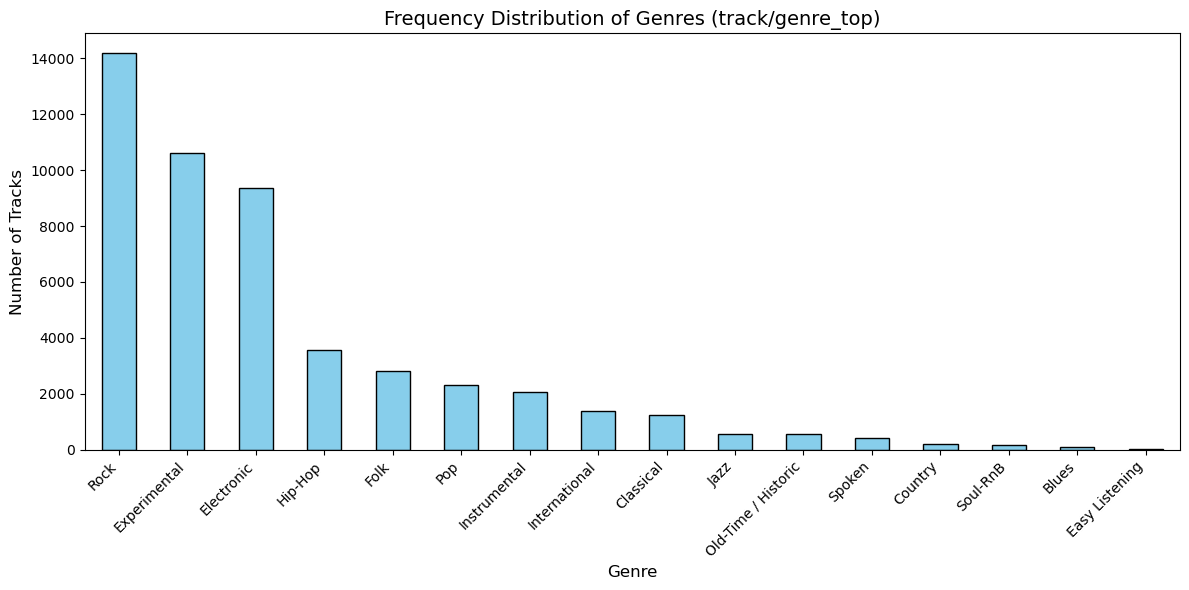

Frequency Distribution of Genres (track/genre_top):
                  Genre  Number of Tracks
0                  Rock             14182
1          Experimental             10608
2            Electronic              9372
3               Hip-Hop              3552
4                  Folk              2803
5                   Pop              2332
6          Instrumental              2079
7         International              1389
8             Classical              1230
9                  Jazz               571
10  Old-Time / Historic               554
11               Spoken               423
12              Country               194
13             Soul-RnB               175
14                Blues               110
15       Easy Listening                24


In [45]:
import matplotlib.pyplot as plt

# Count the frequency of each unique value in 'track/genre_top'
genre_top_counts = tracks_filtered['track/genre_top'].value_counts()

# Plot the frequency distribution as a bar chart
plt.figure(figsize=(12, 6))
genre_top_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency Distribution of Genres (track/genre_top)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Display the frequency distribution in a table format
genre_top_counts_table = genre_top_counts.reset_index()
genre_top_counts_table.columns = ["Genre", "Number of Tracks"]

# Print the table
print("Frequency Distribution of Genres (track/genre_top):")
print(genre_top_counts_table)


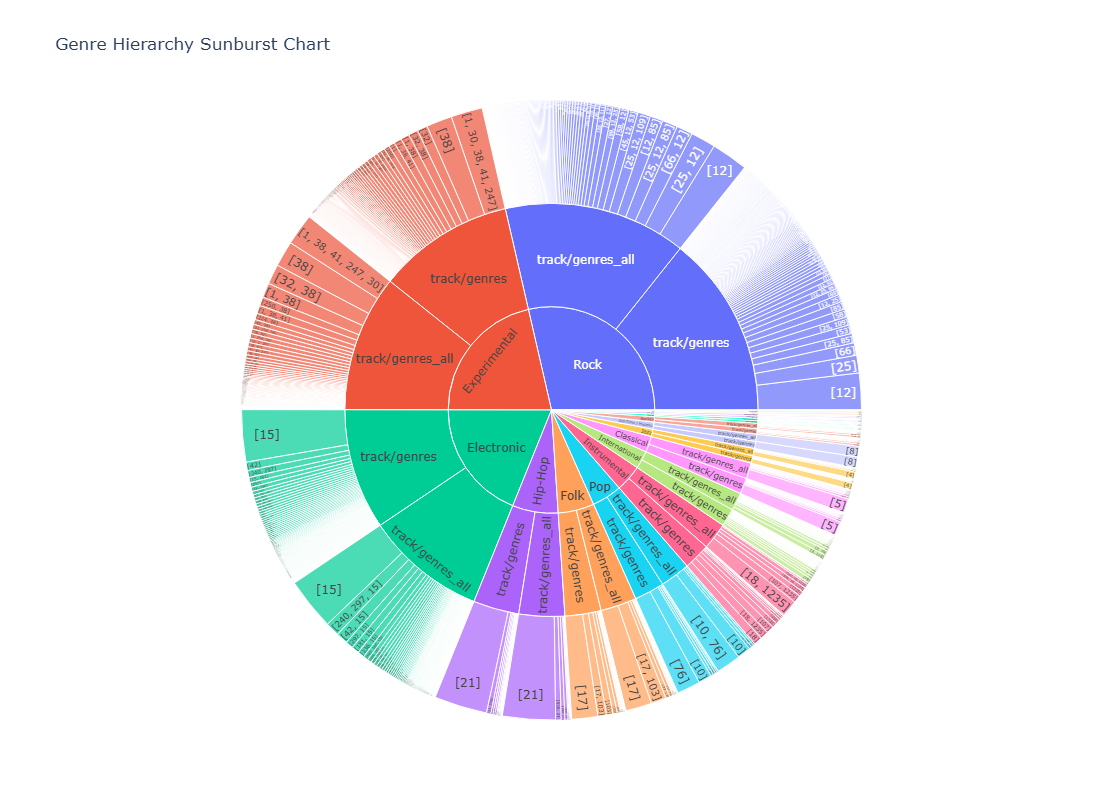

In [46]:
import plotly.express as px
import pandas as pd

# Assuming 'tracks_filtered' is already loaded in the code and contains the required columns
# Drop rows where 'track/genre_top' is None or NaN
tracks_filtered = tracks_filtered.dropna(subset=['track/genre_top'])

# Explode list columns to have each genre in a separate row
tracks_filtered = tracks_filtered.explode('track/genres').explode('track/genres_all')

# Prepare data for sunburst plot
sunburst_data = tracks_filtered.melt(id_vars=['track/genre_top'], value_vars=['track/genres', 'track/genres_all'], 
                                     var_name='level', value_name='genre')

# Drop rows where 'genre' is None or NaN
sunburst_data = sunburst_data.dropna(subset=['genre'])

# Create Sunburst plot
fig = px.sunburst(
    sunburst_data,
    path=['track/genre_top', 'level', 'genre'],
    values=None,
    title="Genre Hierarchy Sunburst Chart",
    width=800,
    height=800
)

# Show the figure
fig.show()

# Summary